# Import Libraries

In [7]:

!pip install scikit-learn

In [5]:
import sklearn as sl

In [10]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib
import folium 
import json
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

country_geo = r'/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data/geoJSON_us_regions.txt'

path=r'/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data/df.3.csv'
print(path)
df=pd.read_csv(path, index_col=False)

%matplotlib inline



/Users/jessicagiron/Desktop/Insurance Predictor Python Project/02 Data/df.3.csv


In [8]:
df.head()

,Unnamed: 0,age,sex,bmi,number_of_children,smoker,region,annual_insurance_cost,cost_category,age_category,bmi_category
0,0,19,female,27.900,0,yes,southwest,16884.92400,High Cost,young adulthood,overweight
1,1,18,male,33.770,1,no,southeast,1725.55230,Low Cost,young adulthood,obesity
2,2,28,male,33.000,3,no,southeast,4449.46200,Low Cost,young adulthood,obesity
3,3,33,male,22.705,0,no,northwest,21984.47061,High Cost,middle age adulthood,healthy weight
4,4,32,male,28.880,0,no,northwest,3866.85520,Low Cost,middle age adulthood,overweight


# BMI and Insurance 

In [15]:
#reshape the variables needed into numpy arrays and put them into separate objects

X = df['bmi'].values.reshape(-1,1)
y = df['annual_insurance_cost'].values.reshape(-1,1)

In [21]:
X

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [22]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [16]:
# Split data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
#create regression object

regression = LinearRegression()

In [19]:
# fit the regression to the train set

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# predict the values of y using x

y_predicted = regression.predict(X_test)

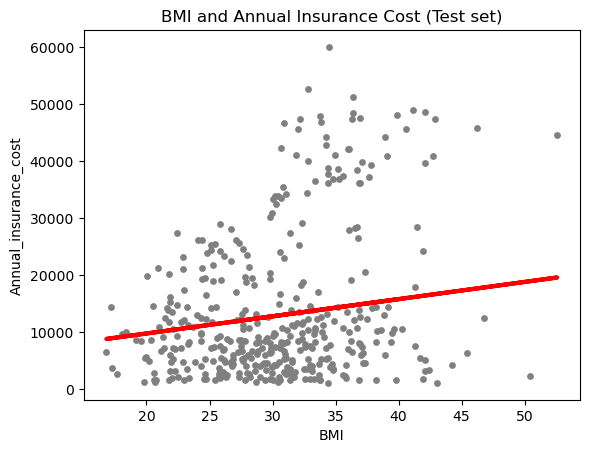

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('BMI and Annual Insurance Cost (Test set)')
plot_test.xlabel('BMI')
plot_test.ylabel('Annual_insurance_cost')
plot_test.show()

The line does not fit very well showing that there is a weak correlation. The R2 score is low as well, proving the point that there is a weak but positive correlation between BMI and annual insurance cost. 

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  154131658.7511644
R2 score:  0.05879287466812988


In [27]:
y_predicted

array([[15772.62039644],
       [12625.19918748],
       [13221.55267971],
       [12890.24518403],
       [ 9215.74386831],
       [ 9101.29218798],
       [11705.06791539],
       [ 9742.82397507],
       [11533.3903949 ],
       [14766.6503641 ],
       [13155.29118057],
       [11929.45344656],
       [13250.16559979],
       [12757.72218576],
       [11580.07463293],
       [18953.17235496],
       [11876.74543588],
       [13564.90772068],
       [ 8843.77590725],
       [13707.97232109],
       [13221.55267971],
       [12423.40280375],
       [12935.42347889],
       [13221.55267971],
       [13950.4291702 ],
       [15024.16664484],
       [ 8986.84050766],
       [13387.20642755],
       [11531.88445174],
       [14509.13408337],
       [12420.39091743],
       [16700.28138434],
       [10435.55782968],
       [15013.6250427 ],
       [ 9959.67979043],
       [13817.90617193],
       [15275.65915292],
       [14742.55527351],
       [ 9673.55058961],
       [13808.87051296],


There are some values that are close and some that are not. In terms of predicting insurance cost, this would not be a relaible model to use. 

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,15772.620396
1,8547.69130,12625.199187
2,9290.13950,13221.552680
3,32548.34050,12890.245184
4,9644.25250,9215.743868
5,2680.94930,9101.292188
6,2198.18985,11705.067915
7,1241.56500,9742.823975
8,2710.82855,11533.390395
9,12235.83920,14766.650364


In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error:  135599557.42526153
R2 score:  0.02444033897433817


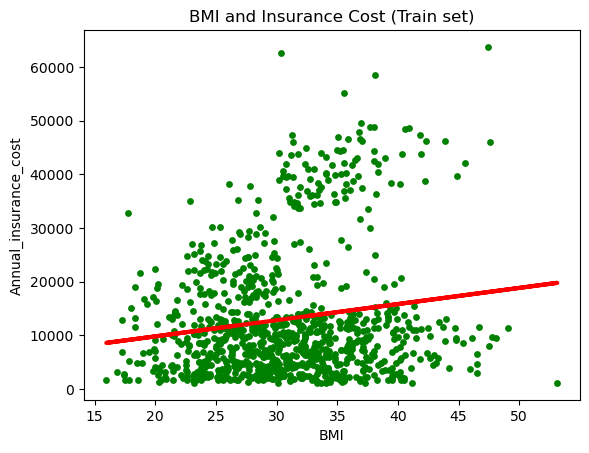

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('BMI and Insurance Cost (Train set)')
plot_test.xlabel('BMI')
plot_test.ylabel('Annual_insurance_cost')
plot_test.show()

The line fit is better in this predictive model, but it is still not up to standards. The error confidence is high.

Hypothesis: If the user has a high BMI score then they have a high annual insurance cost

I believe that there is bias in the data collect. When inspecting, there are evenly distributed values showing the lack of randomness contained within the data. 
This is a fiction data set and it is clear that it does not represent a real population

# Age and Insurance Cost

In [79]:
#reshape the variables needed into numpy and put them into separate objects

X = df['age'].values.reshape(-1,1)
y = df['annual_insurance_cost'].values.reshape(-1,1)

In [80]:
X

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]])

In [81]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [82]:
# Split data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [83]:
#create regression object

regression = LinearRegression()

In [84]:
# fit the regression to the train set

regression.fit(X_train, y_train)

LinearRegression()

In [85]:
# predict the values of y using x

y_predicted = regression.predict(X_test)

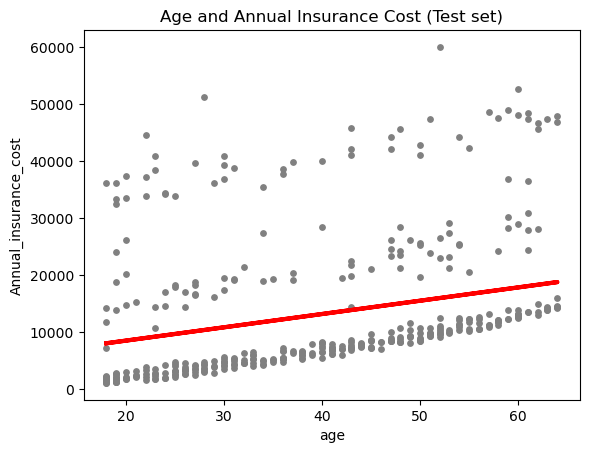

In [86]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age and Annual Insurance Cost (Test set)')
plot_test.xlabel('age')
plot_test.ylabel('Annual_insurance_cost')
plot_test.show()

Trend shows that as the age of the policy holder increases, then so does cost

In [87]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [88]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  146173303.34737504
R2 score:  0.10739068301367427


In [89]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,8086.242979
1,8547.69130,14843.935802
2,9290.13950,15309.983583
3,32548.34050,8319.266870
4,9644.25250,15776.031364
5,2680.94930,9950.434103
6,2198.18985,8086.242979
7,1241.56500,8319.266870
8,2710.82855,8319.266870
9,12235.83920,17407.198597


In [90]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [91]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [92]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[233.02389044]]
Mean squared error:  128318059.75747488
R2 score:  0.07682646420531714


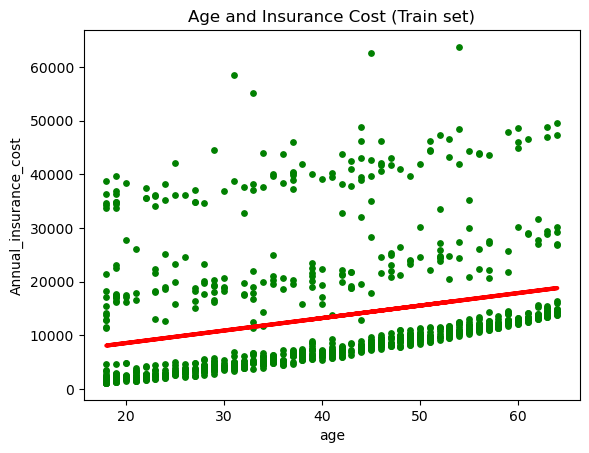

In [93]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age and Insurance Cost (Train set)')
plot_test.xlabel('age')
plot_test.ylabel('Annual_insurance_cost')
plot_test.show()

Although weak, there is correlation between older age and higher insurance cost

# Number of Childeren and Insurance Cost

In [94]:
#reshape the variables needed into numpy arrays and put them into separate objects

X = df['number_of_children'].values.reshape(-1,1)
y = df['annual_insurance_cost'].values.reshape(-1,1)

In [95]:
# Split data into train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [96]:
#create regression object

regression = LinearRegression()

In [97]:
# fit the regression to the train set

regression.fit(X_train, y_train)

LinearRegression()

In [98]:
# predict the values of y using x

y_predicted = regression.predict(X_test)

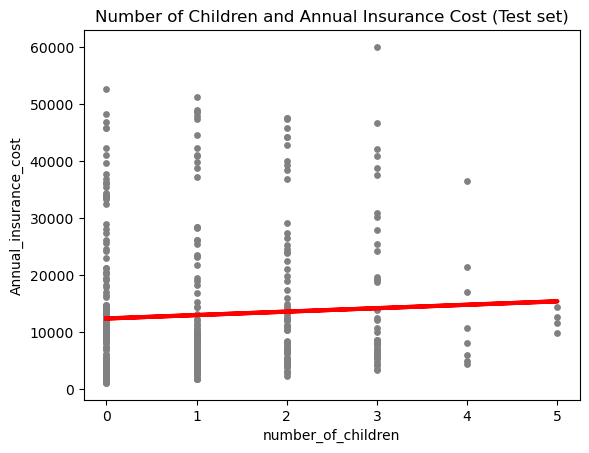

In [99]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Children and Annual Insurance Cost (Test set)')
plot_test.xlabel('number_of_children')
plot_test.ylabel('Annual_insurance_cost')
plot_test.show()

There is no strong correlation, this may be because there is bias in the data

In [100]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [101]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[602.07523344]]
Mean squared error:  163344176.96116966
R2 score:  0.002536503642465826


very weak correlation

In [102]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1633.96180,12402.063145
1,8547.69130,13004.138378
2,9290.13950,13004.138378
3,32548.34050,12402.063145
4,9644.25250,12402.063145
5,2680.94930,12402.063145
6,2198.18985,12402.063145
7,1241.56500,12402.063145
8,2710.82855,13004.138378
9,12235.83920,12402.063145


In [103]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [104]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[602.07523344]]
Mean squared error:  138458507.6170167
R2 score:  0.0038718612232568894


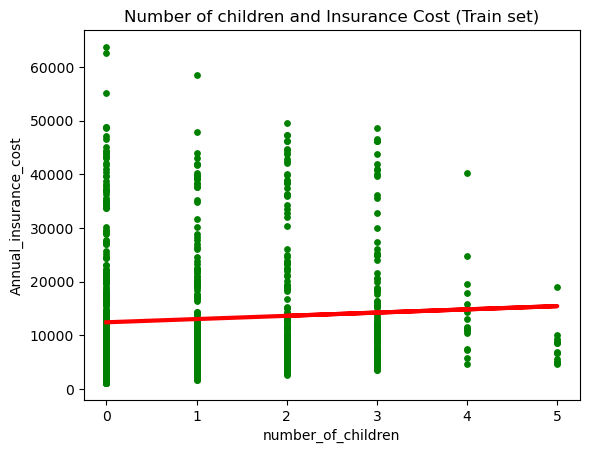

In [105]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of children and Insurance Cost (Train set)')
plot_test.xlabel('number_of_children')
plot_test.ylabel('Annual_insurance_cost')
plot_test.show()

overall there is weak correlation between these variables